# world Happiness report

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('2017.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.shape # There are total 158 rows and 12 columns

(158, 12)

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [8]:
df.sample()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
34,Saudi Arabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872


In [9]:
df['Country'].count

<bound method Series.count of 0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
153         Rwanda
154          Benin
155          Syria
156        Burundi
157           Togo
Name: Country, Length: 158, dtype: object>

In [7]:
df.drop(['Happiness Rank','Country','Region'],axis=1,inplace=True)#we have removed the data whcih is not used to find label
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
df.describe()# Summary of the data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


For coorelation we have to use visulation tool so we will use heat map

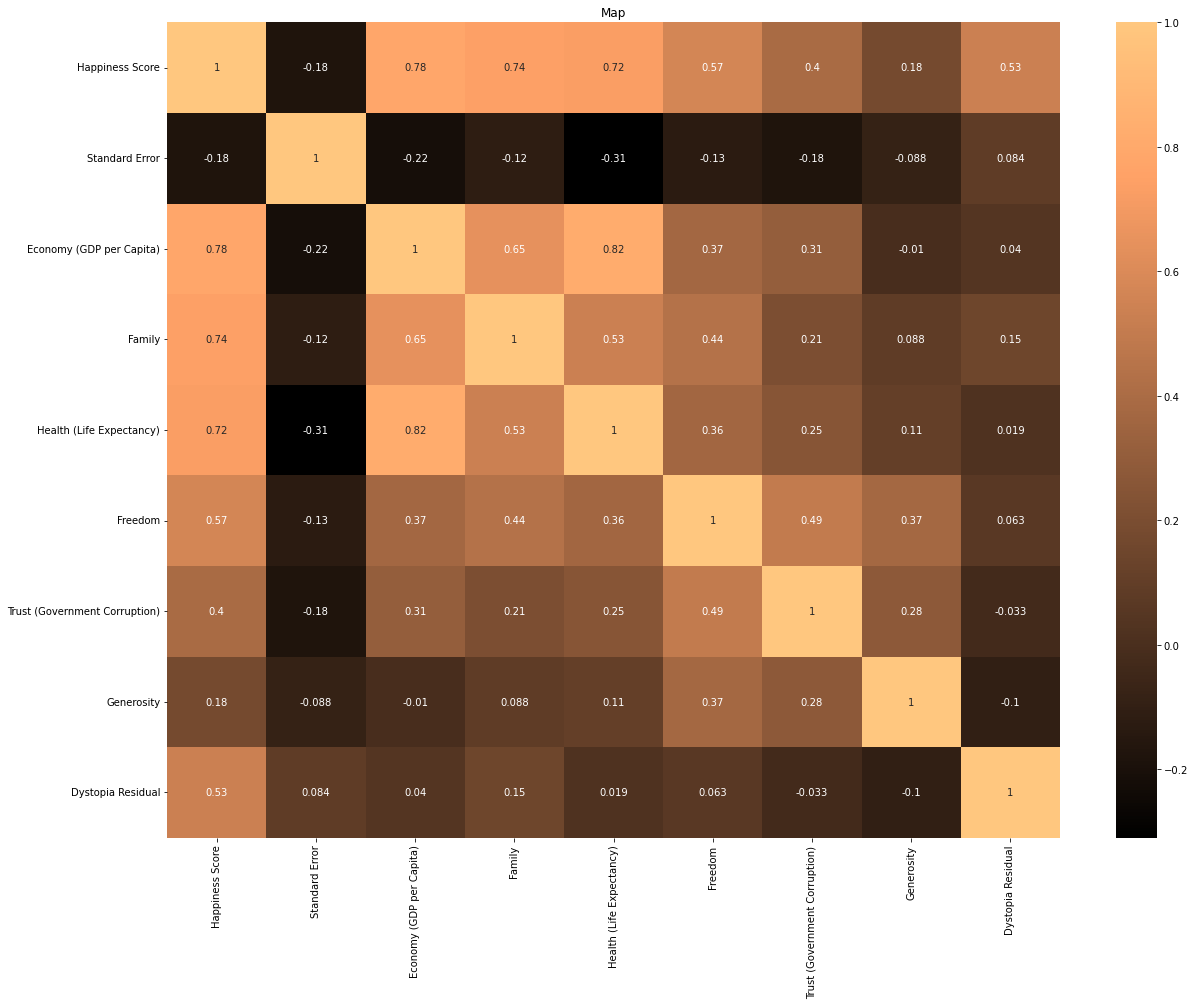

In [10]:
corr_matrix  =df.corr()
#size of the canvas 
plt.rcParams['figure.figsize'] = (20, 15)
#plor the correlation matrix
sns.heatmap(corr_matrix, cmap = 'copper', annot = True)
plt.title('Map')
plt.show()

In [11]:
corr_matrix = df.corr()
corr_matrix['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

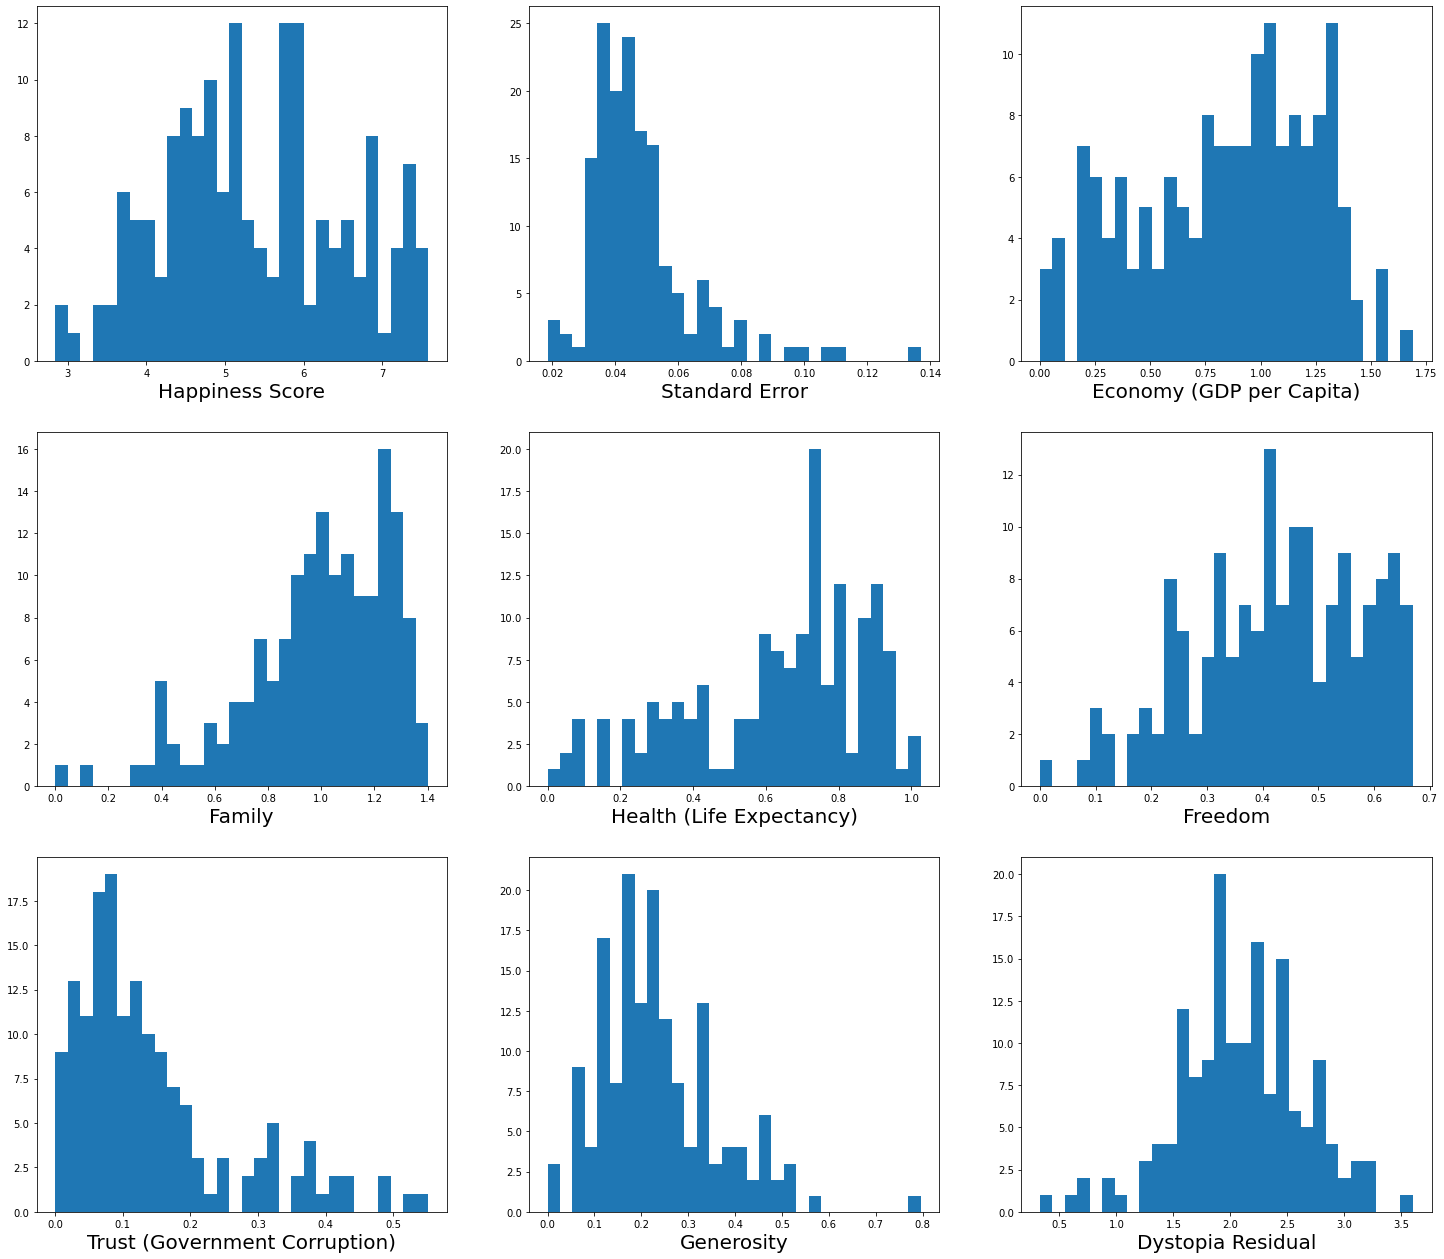

In [13]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in df:
    if plotnumber<=12: #as there are 9 columns in data
        ax=plt.subplot(4,3,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

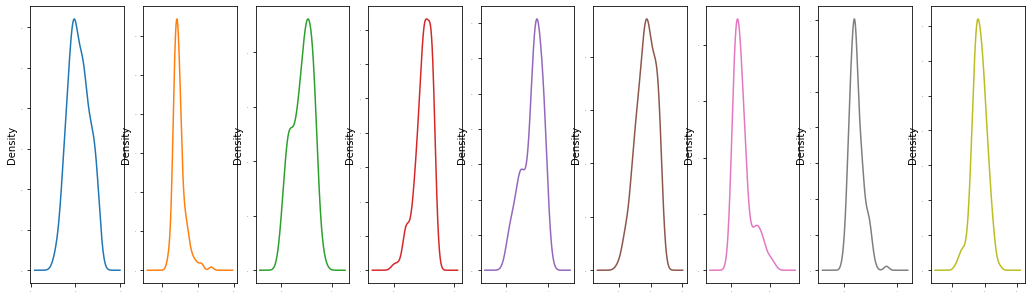

In [15]:
df.plot(kind = 'density',subplots = True, layout = (10,20), sharex = False, legend =False ,fontsize =1,figsize=(40,60))
plt.show()

# we can see skewness in data in some columns

Now we are spliting the data into two variables x any y

In [16]:
y=df['Happiness Score']
x=df.drop('Happiness Score', axis=1)

In [17]:
x.skew().sort_values(ascending = False)

Standard Error                   1.983439
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Economy (GDP per Capita)        -0.317575
Freedom                         -0.413462
Health (Life Expectancy)        -0.705328
Family                          -1.006893
dtype: float64

In [18]:
scaler=MinMaxScaler()
x= scaler.fit_transform(x)
X=pd.DataFrame(x)

In [19]:
x

array([[0.13195441, 0.82613197, 0.96240274, ..., 0.76059502, 0.37289541,
        0.66862987],
       [0.25631068, 0.77041209, 1.        , ..., 0.25629179, 0.54819822,
        0.72503024],
       [0.12494724, 0.78411282, 0.97029731, ..., 0.87617546, 0.42894657,
        0.66088906],
       ...,
       [0.2673702 , 0.39232853, 0.33866769, ..., 0.34255585, 0.59279037,
        0.        ],
       [0.57492613, 0.00905101, 0.29657759, ..., 0.18231233, 0.247864  ,
        0.45957306],
       [0.41190376, 0.12344861, 0.09980531, ..., 0.19443388, 0.2095919 ,
        0.37838928]])

# checking outliers

Happiness Score                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
Standard Error                    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Economy (GDP per Capita)          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Family                            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Health (Life Expectancy)            AxesSubplot(0.125,0.518913;0.168478x0.16413)
Freedom                          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Trust (Government Corruption)    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Generosity                       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Dystopia Residual                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

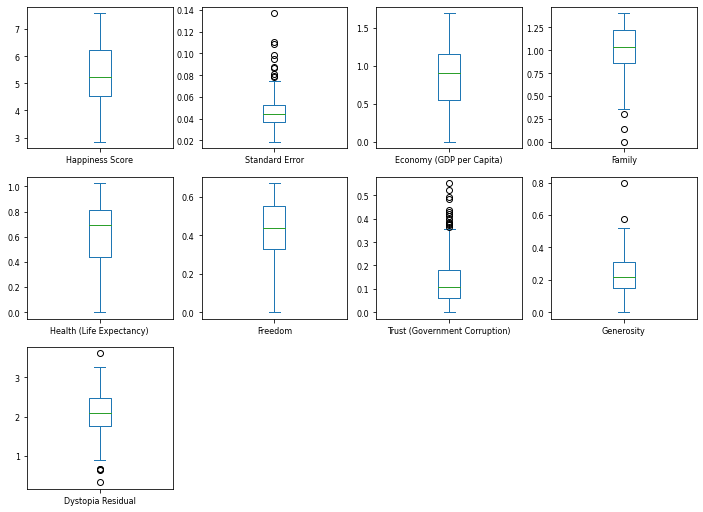

In [20]:
df.plot(kind = 'box', subplots = True, layout = (4,4), fontsize = 8, figsize = (12,12))

In [21]:
#quantile 1
q1=df.quantile(0.25)
#QUANTILE 3
q3=df.quantile(0.75)

IQR=q3-q1
IQR

Happiness Score                  1.717750
Standard Error                   0.015032
Economy (GDP per Capita)         0.612640
Family                           0.357582
Health (Life Expectancy)         0.371828
Freedom                          0.220762
Trust (Government Corruption)    0.118580
Generosity                       0.159330
Dystopia Residual                0.703005
dtype: float64

In [23]:
Se=(q3.Generosity+1.5*IQR.Generosity)

index = np.where(df['Generosity']>Se)

df=df.drop(df.index[index])

df.reset_index()

,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
151,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [25]:
Se=(q3.Family-1.5*IQR.Family)

index = np.where(df['Family']<Se)

df=df.drop(df.index[index])

df.reset_index()

,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
131,145,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
132,148,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
133,150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
134,151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


Happiness Score                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
Standard Error                    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Economy (GDP per Capita)          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Family                            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Health (Life Expectancy)            AxesSubplot(0.125,0.518913;0.168478x0.16413)
Freedom                          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Trust (Government Corruption)    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Generosity                       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Dystopia Residual                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

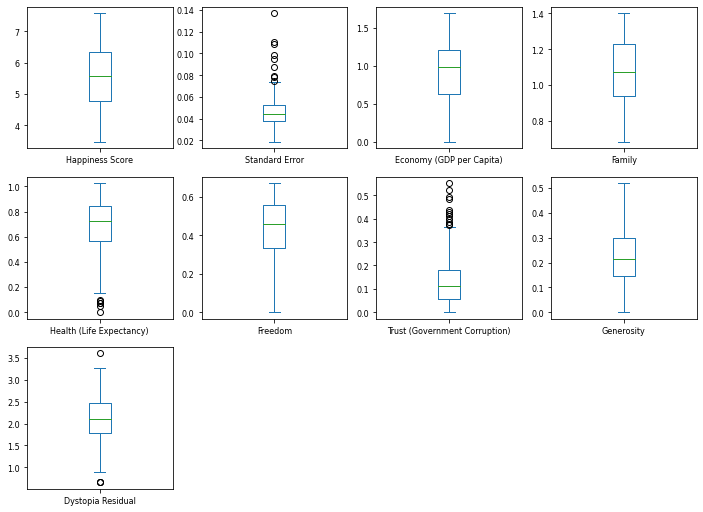

In [26]:
df.plot(kind = 'box', subplots = True, layout = (4,4), fontsize = 8, figsize = (12,12))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)#Spilting the data in train and test

# Linear Regression

In [28]:
Model = LinearRegression()
Model.fit(X_train,y_train)
pred_model = Model.predict(X_test)
print("Accuracy score", r2_score(y_test, pred_model)*100)

Accuracy score 99.99999469925247


In [29]:
print('Mean absolute error:', mean_absolute_error(y_test, pred_model))
print('Mean squared error:', mean_squared_error(y_test, pred_model))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, pred_model)))
print('R2 score is:', r2_score(y_test, pred_model))

Mean absolute error: 0.000257668427177384
Mean squared error: 9.153566049110321e-08
Root Mean squared error: 0.00030254860847656067
R2 score is: 0.9999999469925247


In [30]:
Model.score(X_test,y_test)

0.9999999469925247

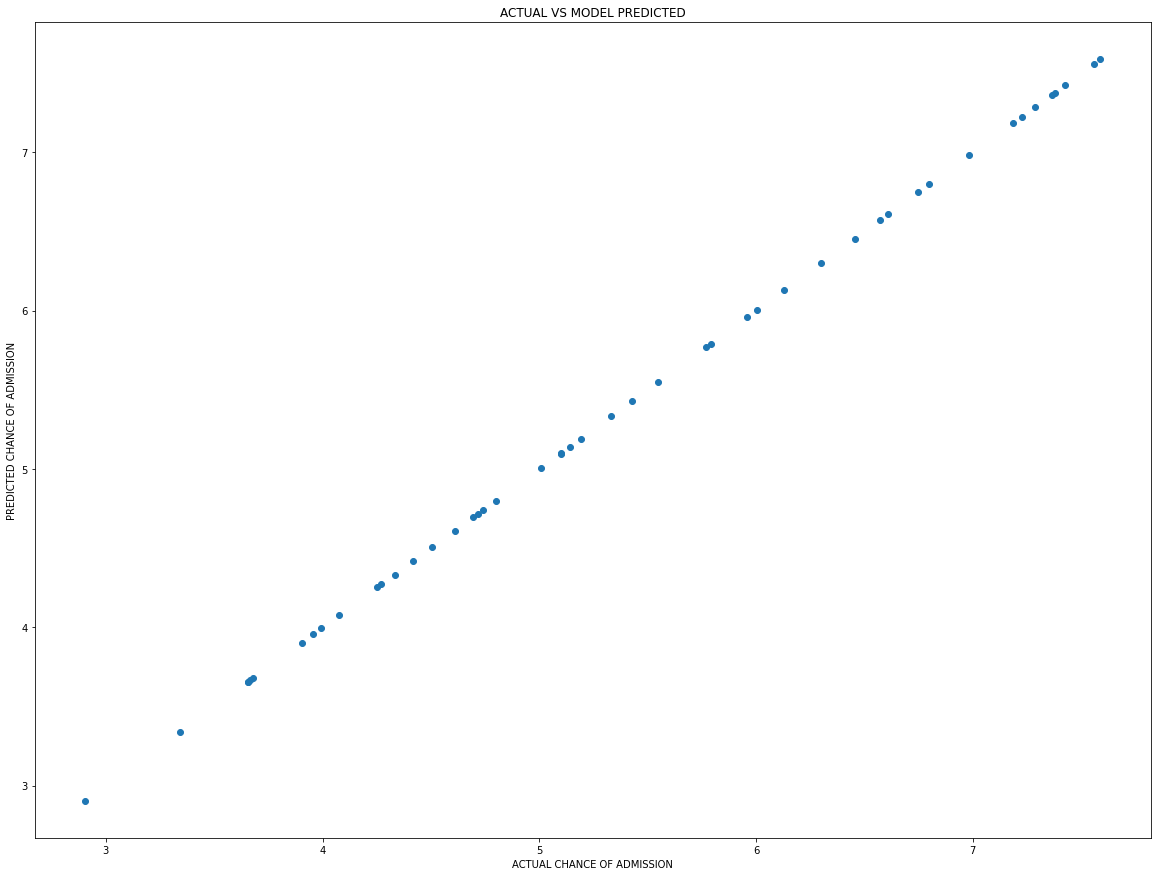

In [31]:
plt.scatter(y_test,pred_model)
plt.xlabel("ACTUAL CHANCE OF ADMISSION")
plt.ylabel("PREDICTED CHANCE OF ADMISSION")
plt.title("ACTUAL VS MODEL PREDICTED")
plt.show()

# decision tree

In [32]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)
print("Accuracy score", r2_score(y_test, pred_dt)*100)

Accuracy score 79.92239577154663


# SVM

In [36]:
svr=SVR()
svr.fit(X_train,y_train)
predlr = svr.predict(X_test)
print("Accuracy score", r2_score(y_test, predlr)*100)

Accuracy score 97.16419778254671


# Random Forest 

In [37]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print("Accuracy score", r2_score(y_test, pred_rf)*100)

Accuracy score 88.84505254294659


# Gradient Boosting

In [38]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
pred_gbr = gbr.predict(X_test)
print("Accuracy score", r2_score(y_test, pred_gbr)*100)

Accuracy score 92.85881705271987


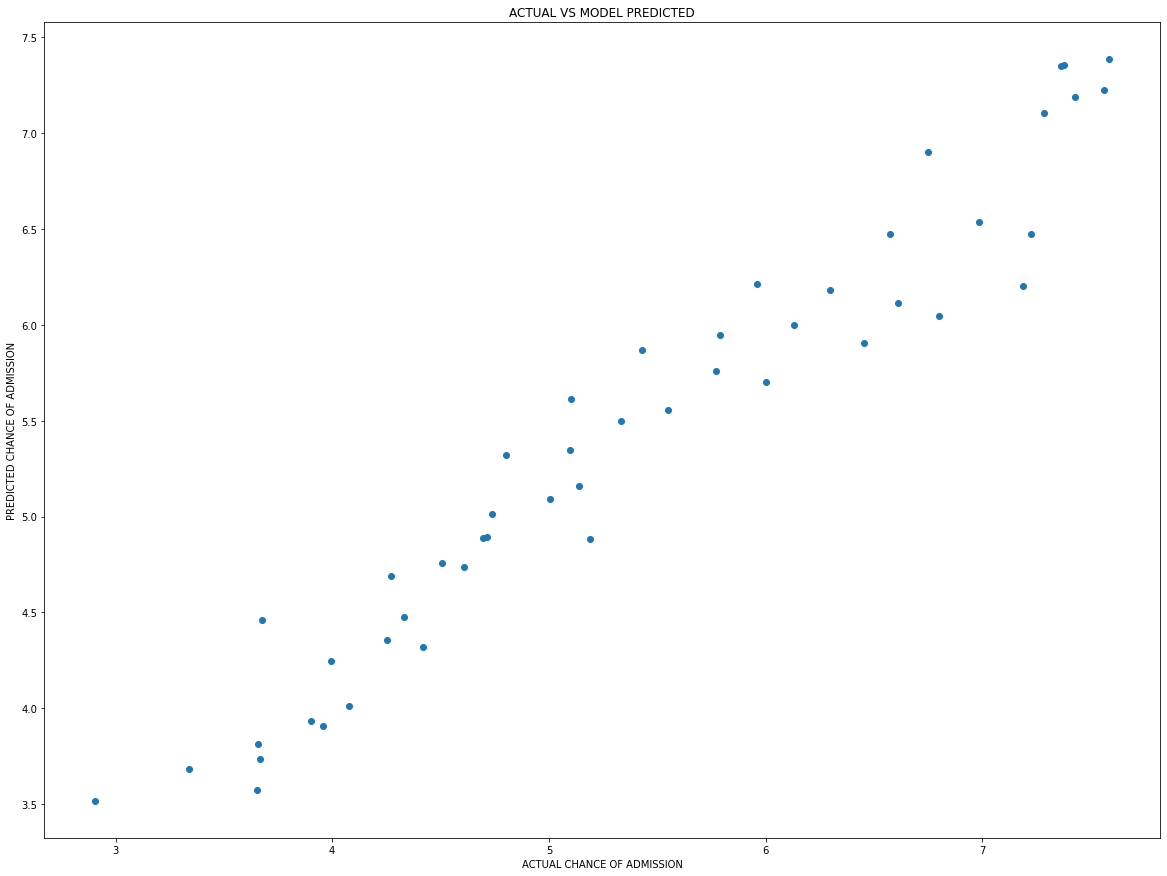

In [39]:
plt.scatter(y_test,pred_gbr)
plt.xlabel("ACTUAL CHANCE OF ADMISSION")
plt.ylabel("PREDICTED CHANCE OF ADMISSION")
plt.title("ACTUAL VS MODEL PREDICTED")
plt.show()

# cross validation

In [34]:
scr = cross_val_score(Model, X_train, y_train, cv=5)
print("Cross validation score of linear regression model is",scr.mean())

Cross validation score of linear regression model is 0.9999999212987148


In [40]:
scr = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross validation score of Random forest model is",scr.mean())

Cross validation score of Random forest model is 0.8394370371109398


In [ ]:
scr = cross_val_score(gbr, X_train, y_train, cv=5)
print("Cross validation score of Gradient boosting model is",scr.mean())